<a href="https://colab.research.google.com/github/upul/WhiteBoard/blob/master/tree/master/upul-ml-dev/chapter_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
x = torch.arange(10)

In [3]:
x.shape

torch.Size([10])

In [4]:
x.numel()

10

In [5]:
x.reshape((5, 2))

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [6]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [7]:
x = torch.tensor([[1.0, 2, 4, 8], [1.0, 2, 4, 8]])

In [8]:
x.shape

torch.Size([2, 4])

In [9]:
X = torch.arange(12, dtype=torch.float32).reshape(4, 3)
Y = torch.arange(12, dtype=torch.float32).reshape(4, 3)

In [10]:
X.shape

torch.Size([4, 3])

In [11]:
Y.shape

torch.Size([4, 3])

In [12]:
Z = torch.cat((X, Y), dim=0)

In [13]:
Z.shape

torch.Size([8, 3])

In [14]:
Z = torch.cat((X, Y), dim=1)
Z.shape

torch.Size([4, 6])

In [15]:
Z

tensor([[ 0.,  1.,  2.,  0.,  1.,  2.],
        [ 3.,  4.,  5.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  6.,  7.,  8.],
        [ 9., 10., 11.,  9., 10., 11.]])

In [16]:
Z.sum()

tensor(132.)

In [17]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [18]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [19]:
a = torch.arange(12).reshape(4, 3)

In [20]:
a

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [21]:
a[:, 1:]

tensor([[ 1,  2],
        [ 4,  5],
        [ 7,  8],
        [10, 11]])

In [22]:
a

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [23]:
before = id(a)
before

139811715996552

In [24]:
a = a + a
id(a) == before

False

In [25]:
before = id(a)
z = torch.zeros_like(a)
z[:] = a + a
before = id(z)

In [26]:
import os

In [27]:
def mkdir_if_not_exist(path):
    if not isinstance(path, str):
        paht = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)


In [28]:
data_file = '../data/house_tiny.csv'
mkdir_if_not_exist('../data')

In [29]:
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv(data_file)

In [32]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [33]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]

In [34]:
inputs 

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


In [35]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [36]:
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [37]:
a

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22]])

In [38]:
a @ a.T

tensor([[  20,   56,   92,  128],
        [  56,  200,  344,  488],
        [  92,  344,  596,  848],
        [ 128,  488,  848, 1208]])

In [39]:
x = torch.arange(5)
y = torch.arange(5)
x, y

(tensor([0, 1, 2, 3, 4]), tensor([0, 1, 2, 3, 4]))

In [40]:
torch.dot(x, y)

tensor(30)

In [41]:
x * y

tensor([ 0,  1,  4,  9, 16])

In [42]:
!pip install d2l==0.14.4

     |████████████████████████████████| 61kB 1.8MB/s 


In [43]:
%matplotlib inline
from d2l import torch as d2l
from IPython import  display
import numpy as np

In [44]:
def f(x):
    return 3*(x**2) - 4*x

In [45]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for _ in range(10):
    print(f'{h} numerical_lim: {numerical_lim(f, 1, h)}')
    h *= 0.1 

0.1 numerical_lim: 2.3000000000000043
0.010000000000000002 numerical_lim: 2.029999999999976
0.0010000000000000002 numerical_lim: 2.0029999999993104
0.00010000000000000003 numerical_lim: 2.000299999997956
1.0000000000000004e-05 numerical_lim: 2.0000300000155837
1.0000000000000004e-06 numerical_lim: 2.0000030001021676
1.0000000000000005e-07 numerical_lim: 2.000000298707504
1.0000000000000005e-08 numerical_lim: 1.999999987845057
1.0000000000000005e-09 numerical_lim: 2.000000165480741
1.0000000000000006e-10 numerical_lim: 2.000000165480741


In [46]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [47]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

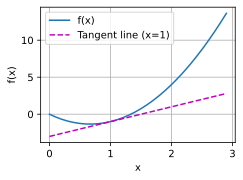

In [48]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

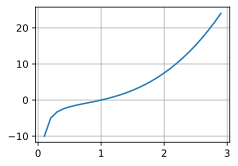

In [54]:
def func(x):
    return x**3 - 1.0 / x

x = np.arange(0.1, 3, 0.1)
plot(x, [func(x), ])

In [61]:
x = torch.arange(5, dtype=torch.float32)

In [63]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  # The default value is None

In [64]:
y = 2 * x @ x.T 

In [65]:
y

tensor(60., grad_fn=<DotBackward>)

In [66]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12., 16.])

In [67]:
x.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [68]:
x.grad

tensor([0., 0., 0., 0., 0.])

In [69]:
y = x.sum()
y

tensor(10., grad_fn=<SumBackward0>)

In [70]:
y.backward()
x.grad

tensor([1., 1., 1., 1., 1.])

In [72]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x 
z.sum().backward()
x.grad 

tensor([ 0.,  1.,  4.,  9., 16.])

In [73]:
u

tensor([ 0.,  1.,  4.,  9., 16.])

In [74]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [75]:
a = torch.randn(size=(), requires_grad=True)

In [76]:
a

tensor(-0.6783, requires_grad=True)

In [77]:
d = f(a)
d

tensor(-138914.9531, grad_fn=<MulBackward0>)

In [78]:
d.backward()

In [79]:
a.grad

tensor(204800.)